In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn import metrics
from sklearn import tree
import graphviz

In [2]:
#Read in data and check variable names match provided document:
house_df = pd.read_csv('house_sale_data.csv')
house_df.columns

Index(['sale_id', 'day', 'month', 'sale_price', 'n_bedrooms', 'n_bathrooms',
       'finished_sqft', 'lot_size_sqft', 'n_floors', 'waterfront_indicator',
       'view_index', 'condition_index', 'construction_grade_index',
       'finished_above_ground_sqft', 'finished_below_ground_sqft',
       'year_built', 'year_renovated', 'zipcode', 'latitude', 'longitude'],
      dtype='object')

In [3]:
#Check first for missing values:
house_df.isnull().sum()

sale_id                       0
day                           0
month                         0
sale_price                    0
n_bedrooms                    0
n_bathrooms                   0
finished_sqft                 0
lot_size_sqft                 0
n_floors                      0
waterfront_indicator          0
view_index                    0
condition_index               0
construction_grade_index      0
finished_above_ground_sqft    0
finished_below_ground_sqft    0
year_built                    0
year_renovated                0
zipcode                       0
latitude                      0
longitude                     0
dtype: int64

In [4]:
#Check data types (notice 'finished_above_ground_sqft' is object):
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
sale_id                       21613 non-null int64
day                           21613 non-null int64
month                         21613 non-null int64
sale_price                    21613 non-null int64
n_bedrooms                    21613 non-null int64
n_bathrooms                   21613 non-null float64
finished_sqft                 21613 non-null int64
lot_size_sqft                 21613 non-null int64
n_floors                      21613 non-null float64
waterfront_indicator          21613 non-null int64
view_index                    21613 non-null int64
condition_index               21613 non-null int64
construction_grade_index      21613 non-null int64
finished_above_ground_sqft    21613 non-null object
finished_below_ground_sqft    21613 non-null int64
year_built                    21613 non-null int64
year_renovated                21613 non-null int64
zipcode            

In [5]:
#Drop 'sale_id' since it is a unique identifier:
house_df.drop(['sale_id'],axis=1,inplace=True)

In [6]:
#Look for strange value causing 'finished_above_ground_sqft' to be Object type:
house_df.sort_values(by=['finished_above_ground_sqft'], ascending = False).head(10)

,day,month,sale_price,n_bedrooms,n_bathrooms,finished_sqft,lot_size_sqft,n_floors,waterfront_indicator,view_index,condition_index,construction_grade_index,finished_above_ground_sqft,finished_below_ground_sqft,year_built,year_renovated,zipcode,latitude,longitude
23,16,5,252700,2,1.50,1070,9643,1.0,0,0,3,7,≥,0,1985,0,54820,47.3533,-92.782
6612,13,10,575575,3,1.75,1516,2897,1.0,0,0,3,7,998,518,1925,0,54893,47.6842,-92.957
14783,17,6,465000,2,2.75,1430,1425,2.0,0,0,3,7,995,435,2006,0,54902,47.6210,-92.914
2750,28,2,352000,4,2.50,1252,25002,1.0,0,0,3,8,992,260,1996,0,54791,47.3216,-92.907
20612,2,8,163800,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,54908,47.5419,-92.887
13582,8,9,274000,3,1.75,1440,7198,1.0,0,0,3,7,990,450,1981,0,54845,47.4333,-92.810
10864,11,4,207000,3,1.00,990,10800,1.0,0,0,4,6,990,0,1959,0,54792,47.2930,-92.831
4998,24,6,400000,3,2.00,1230,11413,1.0,0,0,3,7,990,240,1984,0,54864,47.6321,-92.650
6149,28,4,226000,3,1.75,1490,6269,1.0,0,0,4,6,990,500,1944,0,54846,47.4917,-92.804
5484,26,9,765000,2,1.75,1660,4000,1.0,0,0,3,7,990,670,1940,0,54902,47.6394,-92.896


In [7]:
#Found that there is a non-numeric observation in the 'finished_above_ground_sqft' column
house_df.sort_values(by=['finished_above_ground_sqft'], ascending = False).iloc[0,12]

'≥'

In [8]:
#Since there is only one bad row I will drop bad value instead of imputing and convert column to numeric:
house_df = house_df[house_df.finished_above_ground_sqft != '≥']
house_df['finished_above_ground_sqft'] = pd.to_numeric(house_df['finished_above_ground_sqft'])

In [9]:
#Now one less entry and desired data types:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 19 columns):
day                           21612 non-null int64
month                         21612 non-null int64
sale_price                    21612 non-null int64
n_bedrooms                    21612 non-null int64
n_bathrooms                   21612 non-null float64
finished_sqft                 21612 non-null int64
lot_size_sqft                 21612 non-null int64
n_floors                      21612 non-null float64
waterfront_indicator          21612 non-null int64
view_index                    21612 non-null int64
condition_index               21612 non-null int64
construction_grade_index      21612 non-null int64
finished_above_ground_sqft    21612 non-null int64
finished_below_ground_sqft    21612 non-null int64
year_built                    21612 non-null int64
year_renovated                21612 non-null int64
zipcode                       21612 non-null int64
latitude            

In [10]:
#Ensure bad observation is removed:
house_df.sort_values(by=['finished_above_ground_sqft'], ascending = False).head(10)

,day,month,sale_price,n_bedrooms,n_bathrooms,finished_sqft,lot_size_sqft,n_floors,waterfront_indicator,view_index,condition_index,construction_grade_index,finished_above_ground_sqft,finished_below_ground_sqft,year_built,year_renovated,zipcode,latitude,longitude
12777,5,5,2280000,7,8.00,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,54843,47.6675,-92.602
9254,19,9,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,54829,47.6305,-92.856
7252,13,10,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,54892,47.6298,-92.939
18302,2,7,3300000,5,6.25,8020,21738,2.0,0,0,3,11,8020,0,2001,0,54796,47.5675,-92.805
13411,30,1,2415000,5,4.75,7880,24250,2.0,0,2,3,13,7880,0,1996,0,54967,47.7334,-92.978
19858,22,1,2700000,4,4.00,7850,89651,2.0,0,0,3,12,7850,0,2006,0,54817,47.5406,-92.598
3914,11,6,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,54794,47.6500,-92.830
11871,12,1,1950000,4,3.25,7420,167869,2.0,0,3,3,12,7420,0,2002,0,54835,47.4548,-92.380
18594,8,7,1135250,5,4.00,7320,217800,2.0,0,0,3,11,7320,0,1992,0,54848,47.4473,-92.702
1448,13,4,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,54794,47.6232,-92.836


In [11]:
#Look at summary statistics of data:
house_df.describe()
#Based on these values against what would would be expected, there are some suspicious values that may be outliers
#(i.e. 33 bedrooms and large values for some sqft observations)
#Later on will take z-scores to determine if there are outliers.

,day,month,sale_price,n_bedrooms,n_bathrooms,finished_sqft,lot_size_sqft,n_floors,waterfront_indicator,view_index,condition_index,construction_grade_index,finished_above_ground_sqft,finished_below_ground_sqft,year_built,year_renovated,zipcode,latitude,longitude
count,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,15.688182,6.574496,5.401014e+05,3.370905,2.114786,2079.946465,1.510722e+04,1.494332,0.007542,0.234314,3.409448,7.656904,1788.423931,291.522534,1971.004488,84.406163,54867.942023,47.560062,-92.829899
std,8.635262,3.115361,3.671305e+05,0.930037,0.770170,918.436453,4.142145e+04,0.539991,0.086519,0.766334,0.650752,1.175477,828.095717,442.580840,29.373936,401.688123,53.505270,0.138560,0.140831
min,1.000000,1.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,54791.000000,47.155900,-93.135000
25%,8.000000,4.000000,3.219875e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,54823.000000,47.471075,-92.944000
50%,16.000000,6.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,54855.000000,47.571800,-92.846500
75%,23.000000,9.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,54908.000000,47.678000,-92.741000
max,31.000000,12.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,54989.000000,47.777600,-91.931000


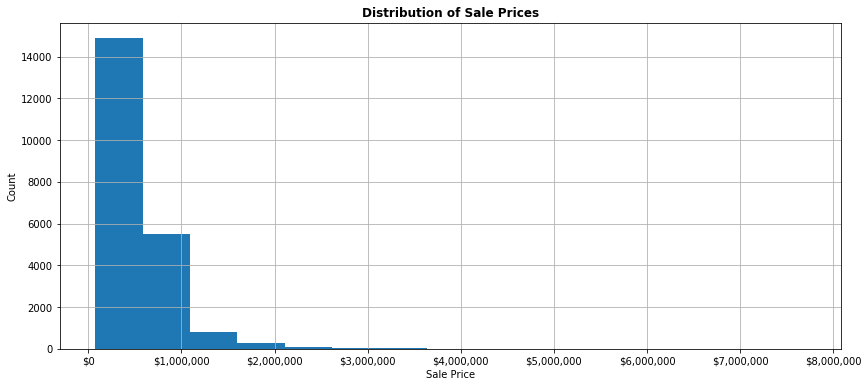

In [12]:
#Plot distribution of target variable:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
house_df['sale_price'].plot(kind='hist', x='sale_price', bins = 15, ax=ax)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.grid()
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribution of Sale Prices',
          fontweight ="bold")
plt.show()

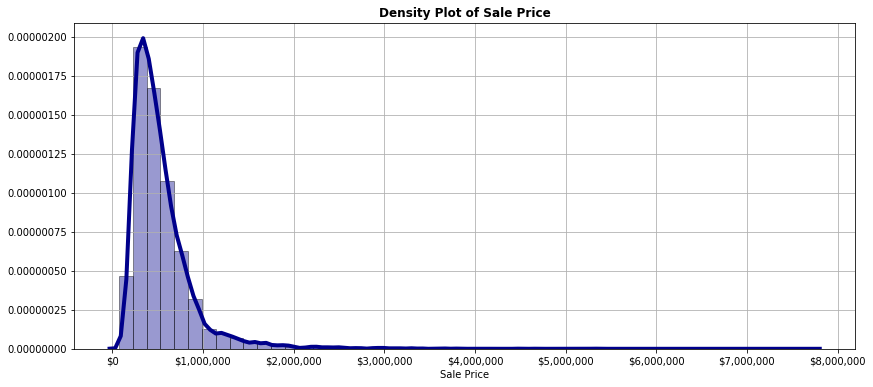

In [13]:
# Density Plot of target variable:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
fig = sns.distplot(house_df['sale_price'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.grid()
plt.xlabel("Sale Price")
plt.title("Density Plot of Sale Price", fontweight="bold")
plt.show(fig)

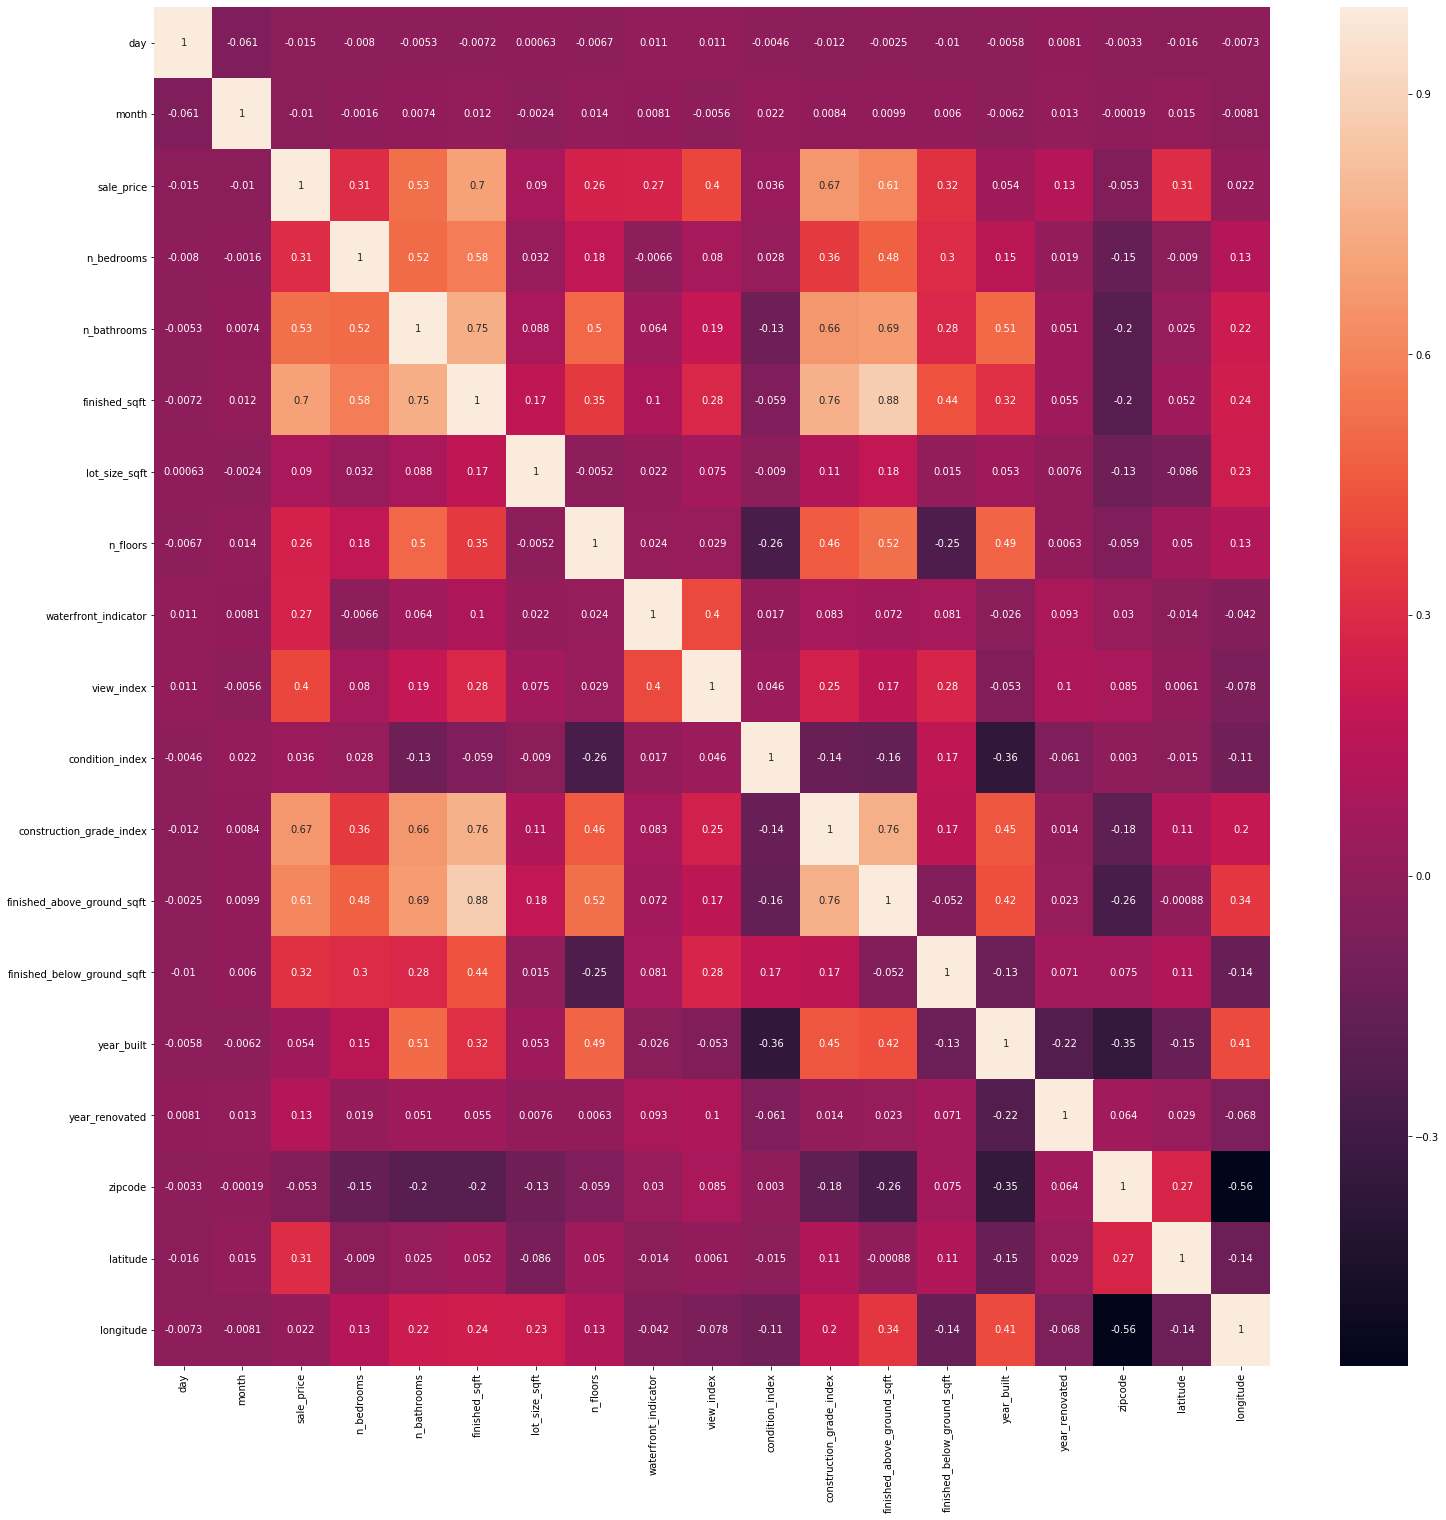

In [15]:
#Check correlation between variables:
corrMatrix = house_df.corr()
sns.heatmap(corrMatrix, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
plt.rcParams['figure.figsize'] = [25, 25]
plt.show()

In [16]:
#Check correlation between varibales:
house_df.corr().unstack().sort_values().drop_duplicates()

zipcode                     longitude                    -0.564069
year_built                  condition_index              -0.361408
                            zipcode                      -0.346858
n_floors                    condition_index              -0.263802
zipcode                     finished_above_ground_sqft   -0.261235
n_floors                    finished_below_ground_sqft   -0.245740
year_renovated              year_built                   -0.224870
n_bathrooms                 zipcode                      -0.203906
zipcode                     finished_sqft                -0.199485
                            construction_grade_index     -0.184890
finished_above_ground_sqft  condition_index              -0.158243
n_bedrooms                  zipcode                      -0.152740
year_built                  latitude                     -0.148098
finished_below_ground_sqft  longitude                    -0.144756
condition_index             construction_grade_index     -0.14

In [ ]:
#Pairplot to look for outliers:
sns.pairplot(house_df)

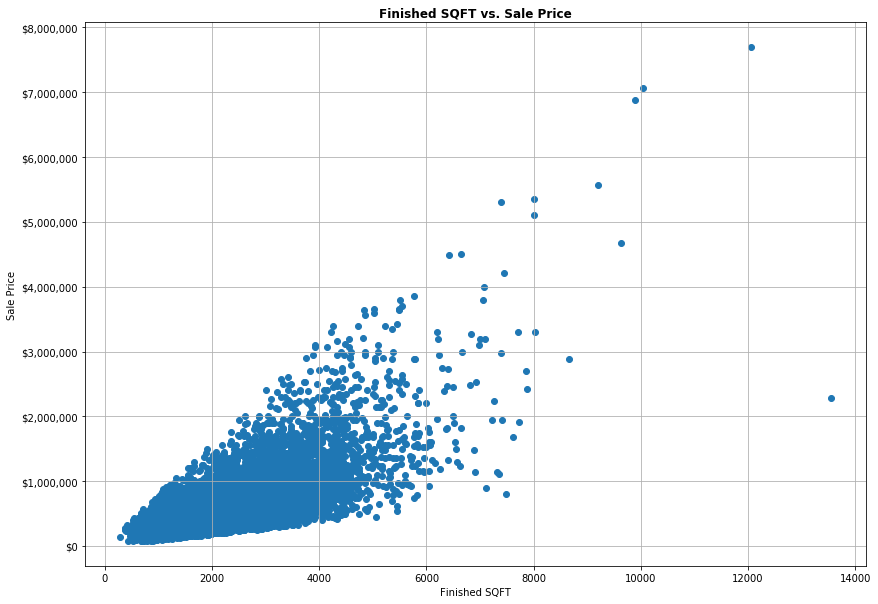

In [17]:
#Based on correlation and pair plots, 'sale_price' is most correlated with 'finished_sqft':
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
fig = plt.scatter(house_df['finished_sqft'], house_df['sale_price'])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.grid()
plt.ylabel("Sale Price")
plt.xlabel("Finished SQFT")
plt.title("Finished SQFT vs. Sale Price", fontweight="bold")
plt.show(fig)

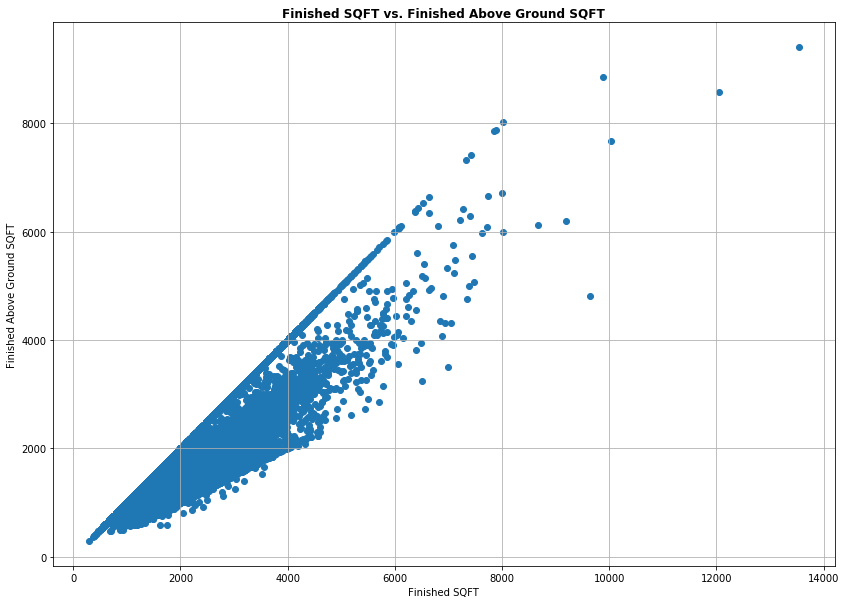

In [18]:
#Shows strong collinearity and a few outliers (also notice striaght line from where observations don't have below ground sqft)
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
fig = plt.scatter(house_df['finished_sqft'], house_df['finished_above_ground_sqft'])
plt.grid()
plt.ylabel("Finished Above Ground SQFT")
plt.xlabel("Finished SQFT")
plt.title("Finished SQFT vs. Finished Above Ground SQFT", fontweight="bold")
plt.show(fig)

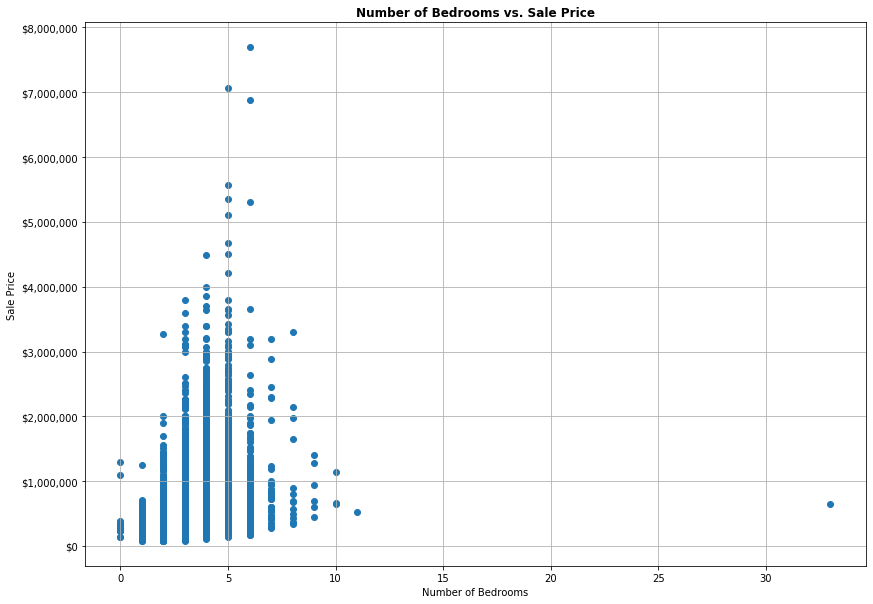

In [19]:
#I see one other major outlier in 'n_bedrooms' and based on the pair plot there are a couple other minor outliers:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
plt.scatter(house_df['n_bedrooms'], house_df['sale_price'])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.grid()
plt.ylabel("Sale Price")
plt.xlabel("Number of Bedrooms")
plt.title("Number of Bedrooms vs. Sale Price", fontweight="bold")
plt.show(fig)

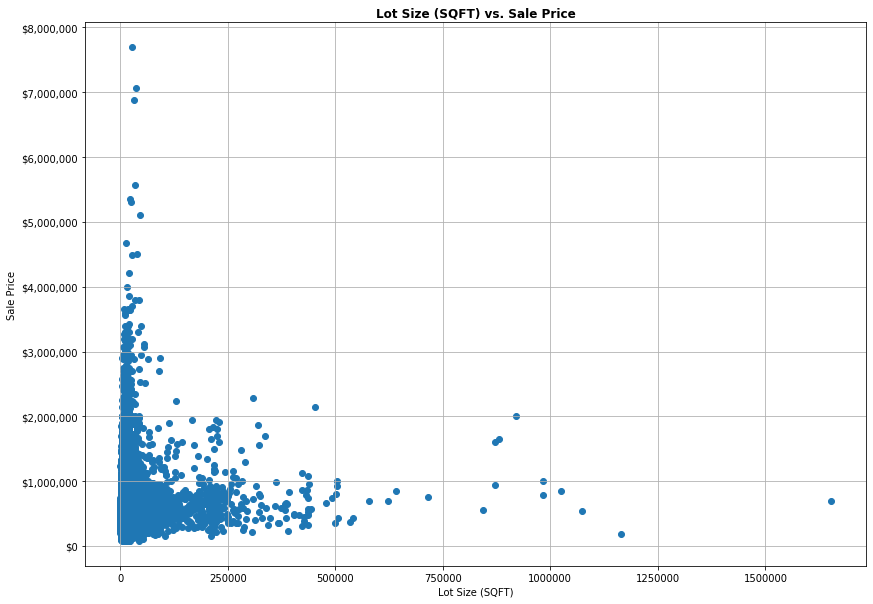

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
plt.scatter(house_df['lot_size_sqft'], house_df['sale_price'])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.grid()
plt.ylabel("Sale Price")
plt.xlabel("Lot Size (SQFT)")
plt.title("Lot Size (SQFT) vs. Sale Price", fontweight="bold")
plt.show(fig)

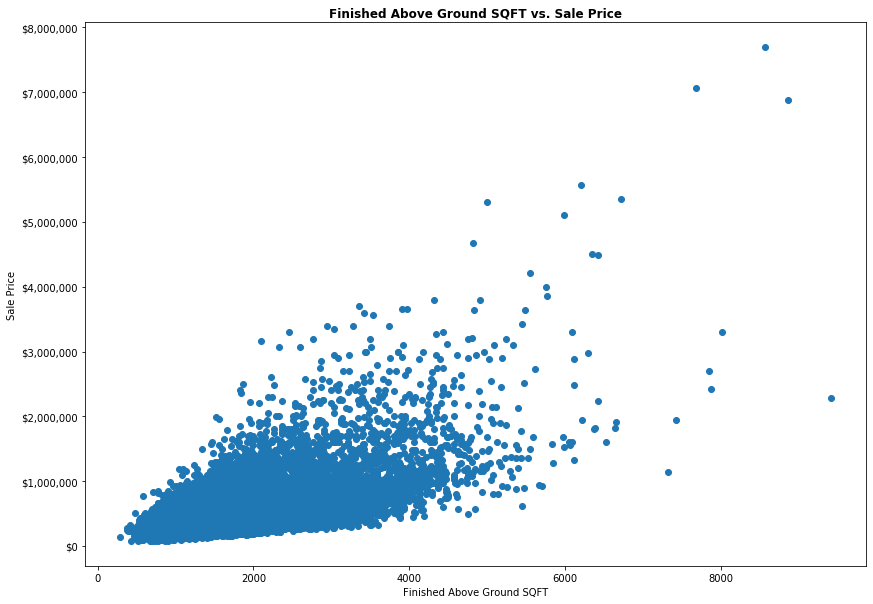

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
plt.scatter(house_df['finished_above_ground_sqft'], house_df['sale_price'])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylabel("Sale Price")
plt.xlabel("Finished Above Ground SQFT")
plt.title("Finished Above Ground SQFT vs. Sale Price", fontweight="bold")
plt.show(fig)

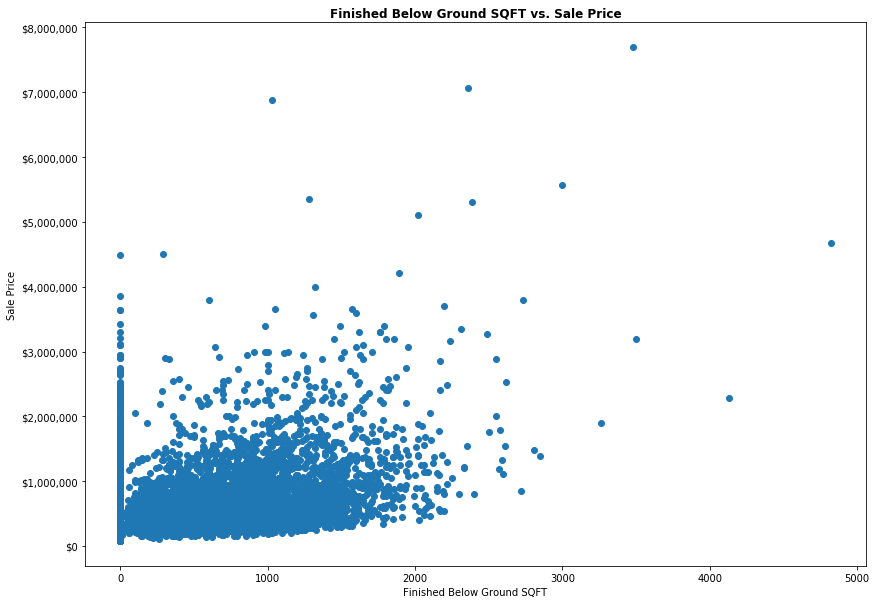

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
plt.scatter(house_df['finished_below_ground_sqft'], house_df['sale_price'])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.ylabel("Sale Price")
plt.xlabel("Finished Below Ground SQFT")
plt.title("Finished Below Ground SQFT vs. Sale Price", fontweight="bold")
plt.show(fig)

In [23]:
#Catergorical changes (only zipcode for encoding purposes):
print(house_df['zipcode'].value_counts())
house_df['zipcode'] = house_df['zipcode'].astype('category')
print(house_df.info())

54893    602
54828    590
54905    583
54842    574
54907    553
54832    548
54824    545
54908    508
54813    499
54796    498
54923    494
54849    468
54848    455
54945    446
54864    441
54823    432
54817    412
54915    410
54846    406
54843    405
54791    362
54865    359
54916    354
54882    351
54934    343
54896    335
54906    330
54819    321
54989    317
54794    317
        ... 
54902    269
54958    269
54845    268
54897    266
54926    263
54968    262
54820    255
54967    255
54956    254
54812    234
54895    229
54835    221
54792    199
54867    198
54801    195
54809    190
54898    186
54909    184
54795    168
54797    141
54978    136
54822    125
54804    124
54860    118
54899    109
54892    105
54800    100
54814     81
54938     57
54829     50
Name: zipcode, Length: 70, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 19 columns):
day                           21612 non-null int64
month  

In [24]:
#Encode zipcode to dummy vars:
cat_cols = ['zipcode']
coded_df = pd.get_dummies(house_df, columns = cat_cols)
coded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 0 to 21612
Data columns (total 88 columns):
day                           21612 non-null int64
month                         21612 non-null int64
sale_price                    21612 non-null int64
n_bedrooms                    21612 non-null int64
n_bathrooms                   21612 non-null float64
finished_sqft                 21612 non-null int64
lot_size_sqft                 21612 non-null int64
n_floors                      21612 non-null float64
waterfront_indicator          21612 non-null int64
view_index                    21612 non-null int64
condition_index               21612 non-null int64
construction_grade_index      21612 non-null int64
finished_above_ground_sqft    21612 non-null int64
finished_below_ground_sqft    21612 non-null int64
year_built                    21612 non-null int64
year_renovated                21612 non-null int64
latitude                      21612 non-null float64
longitude         

In [ ]:
#coded_df = coded_df.drop(['finished_above_ground_sqft', 'finished_below_ground_sqft'], axis = 1)

In [26]:
#Compute z-scores to look for integer outliers in selected variables (all others were not suspicious in .desbcribe()):
coded_df_out = coded_df[['sale_price', 'n_bedrooms', 'finished_above_ground_sqft', 'finished_below_ground_sqft','finished_sqft', 'lot_size_sqft']]
coded_df_out.head(10)
z = np.abs(stats.zscore(coded_df_out))
print(z)
filtered = (z < 5).all(axis=1)
print(filtered)
new_df = coded_df[filtered]
print(new_df.shape)
print(house_df.shape)
#307 removed

[[0.86674579 0.39881617 0.73474358 0.65870289 0.97989064 0.22832225]
 [0.00572409 0.39881617 0.46079806 0.24510771 0.53358604 0.18988717]
 [0.98087679 1.47406755 1.22986688 0.65870289 1.42631182 0.12330177]
 ...
 [0.37589805 1.47406755 0.92796242 0.65870289 1.15410379 0.33213559]
 [0.38162094 0.39881617 0.2275441  0.65870289 0.52258114 0.30707553]
 [0.58591271 1.47406755 0.92796242 0.65870289 1.15410379 0.33875067]]
[ True  True  True ...  True  True  True]
(21305, 88)
(21612, 19)


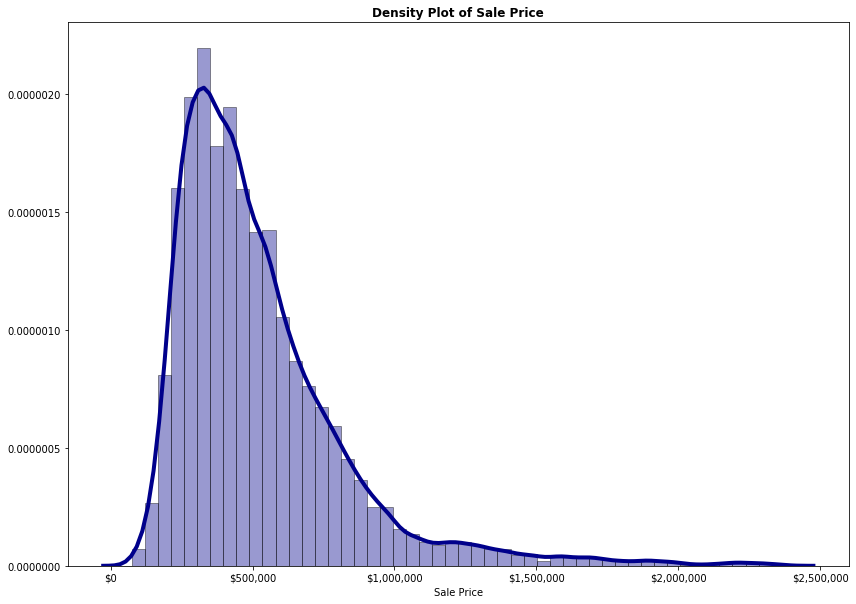

In [27]:
# Density Plot of target variable after outlier removal:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
fig = sns.distplot(new_df['sale_price'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xlabel("Sale Price")
plt.title("Density Plot of Sale Price", fontweight="bold")
plt.show(fig)

In [28]:
#Check skewedness of current distribution:
new_df.skew()

day                           -0.006404
month                          0.063502
sale_price                     2.033444
n_bedrooms                     0.378922
n_bathrooms                    0.299440
finished_sqft                  0.977880
lot_size_sqft                  6.228208
n_floors                       0.628911
waterfront_indicator          12.888625
view_index                     3.518023
condition_index                1.030908
construction_grade_index       0.677481
finished_above_ground_sqft     1.173523
finished_below_ground_sqft     1.417515
year_built                    -0.462935
year_renovated                 4.602023
latitude                      -0.478130
longitude                      0.894214
zipcode_54791                  7.486104
zipcode_54792                 10.202176
zipcode_54793                  8.550608
zipcode_54794                  8.336052
zipcode_54795                 11.128381
zipcode_54796                  6.406842
zipcode_54797                 12.170736


In [29]:
#log transformation and re-check skewedness:
new_df['sale_price'] = np.log(new_df['sale_price'])
new_df.skew()

/Users/bchoskins/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


day                           -0.006404
month                          0.063502
sale_price                     0.232340
n_bedrooms                     0.378922
n_bathrooms                    0.299440
finished_sqft                  0.977880
lot_size_sqft                  6.228208
n_floors                       0.628911
waterfront_indicator          12.888625
view_index                     3.518023
condition_index                1.030908
construction_grade_index       0.677481
finished_above_ground_sqft     1.173523
finished_below_ground_sqft     1.417515
year_built                    -0.462935
year_renovated                 4.602023
latitude                      -0.478130
longitude                      0.894214
zipcode_54791                  7.486104
zipcode_54792                 10.202176
zipcode_54793                  8.550608
zipcode_54794                  8.336052
zipcode_54795                 11.128381
zipcode_54796                  6.406842
zipcode_54797                 12.170736


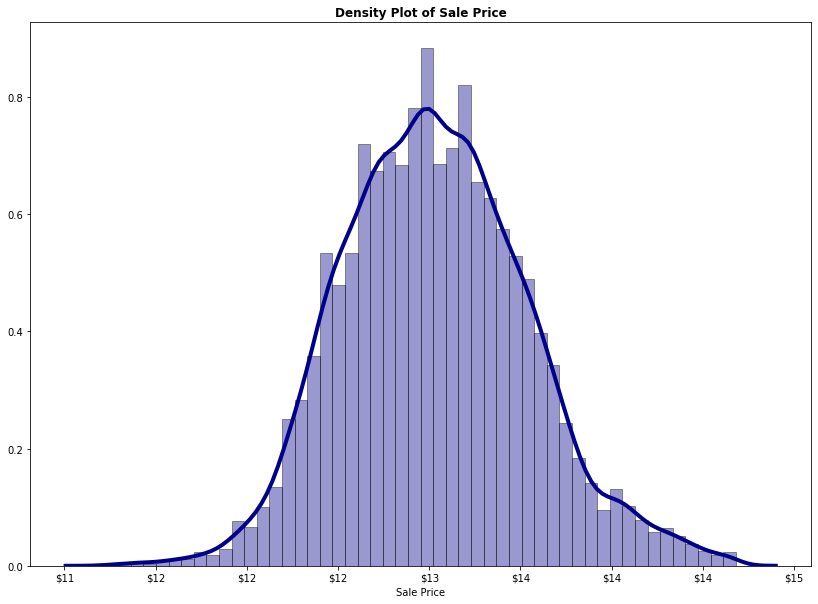

In [30]:
# Density Plot of target variable (log transformed):
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
fig = sns.distplot(new_df['sale_price'], hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
plt.xlabel("Sale Price")
plt.title("Density Plot of Sale Price", fontweight="bold")
plt.show(fig)

In [31]:
#Check sale_price stats now:
new_df.describe()

,day,month,sale_price,n_bedrooms,n_bathrooms,finished_sqft,lot_size_sqft,n_floors,waterfront_indicator,view_index,...,zipcode_54936,zipcode_54938,zipcode_54945,zipcode_54956,zipcode_54958,zipcode_54967,zipcode_54968,zipcode_54978,zipcode_54988,zipcode_54989
count,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,...,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000,21305.000000
mean,15.682281,6.572589,13.033065,3.358320,2.097102,2048.369678,12518.234968,1.490965,0.005914,0.217977,...,0.013518,0.002675,0.020887,0.011828,0.012626,0.011734,0.012298,0.006383,0.013142,0.014738
std,8.633743,3.113677,0.506003,0.892625,0.744360,853.151594,22288.925137,0.539772,0.076677,0.734385,...,0.115481,0.051657,0.143010,0.108115,0.111657,0.107690,0.110213,0.079643,0.113887,0.120506
min,1.000000,1.000000,11.225243,0.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,12.676076,3.000000,1.500000,1420.000000,5013.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,6.000000,13.017001,3.000000,2.250000,1900.000000,7560.000000,1.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,9.000000,13.361380,4.000000,2.500000,2520.000000,10464.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,12.000000,14.680508,8.000000,6.500000,6630.000000,222156.000000,3.500000,1.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#Prepare data:
X = new_df.drop(['sale_price'], axis=1)
y = new_df['sale_price']
print(X)
print(y)

       day  month  n_bedrooms  n_bathrooms  finished_sqft  lot_size_sqft  \
0       13     10           3         1.00           1180           5650   
1        9     12           3         2.25           2570           7242   
2       25      2           2         1.00            770          10000   
3        9     12           4         3.00           1960           5000   
4       18      2           3         2.00           1680           8080   
5       12      5           4         4.50           5420         101930   
6       27      6           3         2.25           1715           6819   
7       15      1           3         1.50           1060           9711   
8       15      4           3         1.00           1780           7470   
9       12      3           3         2.50           1890           6560   
10       3      4           3         2.50           3560           9796   
11      27      5           2         1.00           1160           6000   
12      28  

In [33]:
#Split data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
#Base Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
#Compute model predictions:
y_pred = lr.predict(X_test)

In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.13051524589303717
Mean Squared Error: 0.031166480435138273
Root Mean Squared Error: 0.17654030824471298


In [37]:
#R^2
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.87
Test set score: 0.88


In [38]:
#Base Model 2: Gradient Boosted Regression (least squares)
gb = GradientBoostingRegressor(loss = 'ls')
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
#Compute model predictions:
y_pred_xgb = gb.predict(X_test)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

Mean Absolute Error: 0.1289596351836417
Mean Squared Error: 0.03004619400571136
Root Mean Squared Error: 0.1733383800712103


In [41]:
#R^2
print("Training set score: {:.2f}".format(gb.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gb.score(X_test, y_test)))

Training set score: 0.88
Test set score: 0.88


In [42]:
#Base Model 3: Random Forest 
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

/Users/bchoskins/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
#Compute model predictions:
y_pred_rf = rf.predict(X_test)

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 0.12760652922839433
Mean Squared Error: 0.03145238275445216
Root Mean Squared Error: 0.17734819636650428


In [45]:
#R^2
print("Training set score: {:.2f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.87


In [ ]:
#Going with Gradient Boosted Model

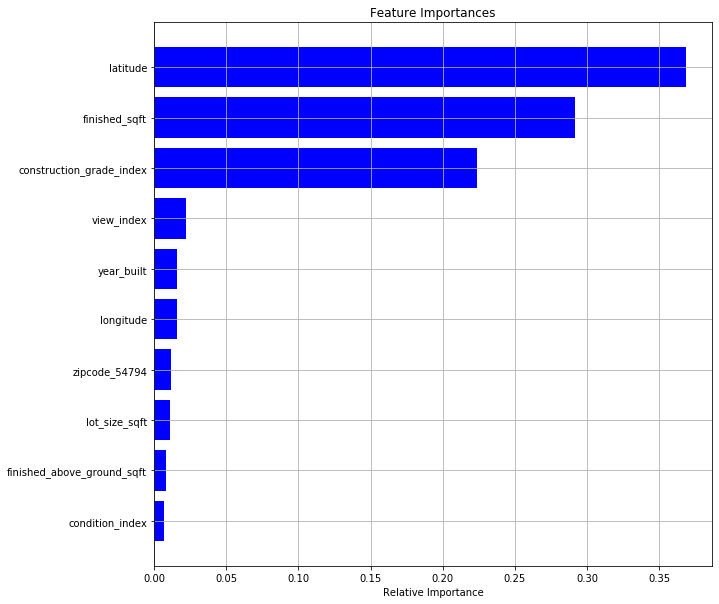

In [46]:
#Feature Importance:
features = X_train.columns
importances = gb.feature_importances_
indices = np.argsort(importances)

#Top 10 
num_features = 10 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

In [47]:
#Get feature importance values to test removal performance:
def feat_importance(m,df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

importance = feat_importance(gb,X_train)
importance[:]

,Importance
latitude,0.368336
finished_sqft,0.291532
construction_grade_index,0.223976
view_index,0.021890
year_built,0.015728
longitude,0.015478
zipcode_54794,0.011949
lot_size_sqft,0.011269
finished_above_ground_sqft,0.007942
condition_index,0.006480


In [56]:
#keep all non-zero importance features:
to_keep = importance[importance['Importance'] > 0].index
keep_train_df = X_train[to_keep]
keep_test_df = X_test[to_keep]

In [57]:
#Fit model with dropped features:
gb_new_feat = GradientBoostingRegressor(loss = 'ls')
gb_new_feat.fit(keep_train_df, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [58]:
y_pred_xgb2 = gb_new_feat.predict(keep_test_df)

In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb2)))

Mean Absolute Error: 0.13035125721543026
Mean Squared Error: 0.0305979790234482
Root Mean Squared Error: 0.17492278017299004


In [60]:
print("Training set score: {:.2f}".format(gb_new_feat.score(keep_train_df, y_train)))
print("Test set score: {:.2f}".format(gb_new_feat.score(keep_test_df, y_test)))

Training set score: 0.88
Test set score: 0.88


In [85]:
#Try parameter tuning:
params = {'n_estimators': 1000,
          'max_depth': 7,
          'min_samples_split': 7,
          'learning_rate': 0.01,
          'loss': 'ls',
          'criterion':'mse'}

In [86]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=7, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [87]:
y_pred_xgb3 = reg.predict(X_test)

In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb3)))

Mean Absolute Error: 0.1104416587765792
Mean Squared Error: 0.023706138662299717
Root Mean Squared Error: 0.15396797934083475


In [89]:
print("Training set score: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set score: {:.2f}".format(reg.score(X_test, y_test)))

Training set score: 0.94
Test set score: 0.91


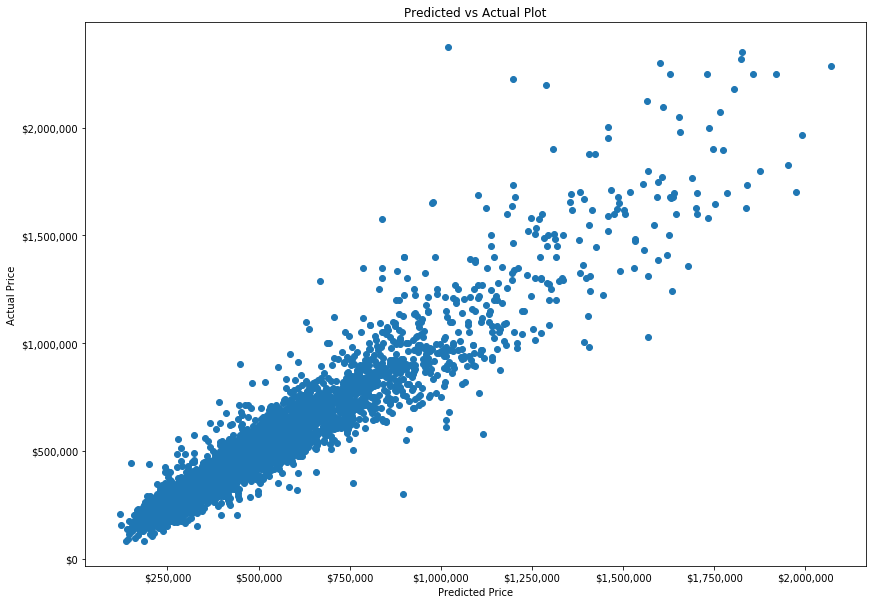

In [90]:
#Visualize model fit:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))
fig = plt.scatter(np.exp(y_pred_xgb3), np.exp(y_test))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 
ax.yaxis.set_major_formatter(tick) 
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Predicted vs Actual Plot")
plt.show()

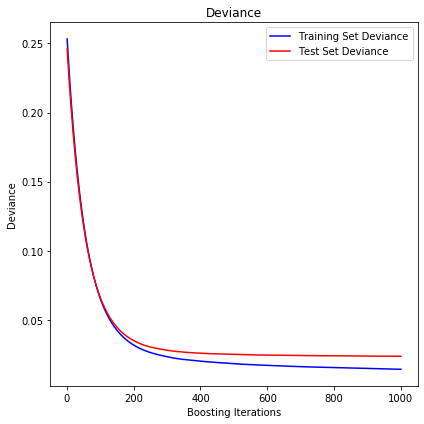

In [91]:
#Plot training deviance:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

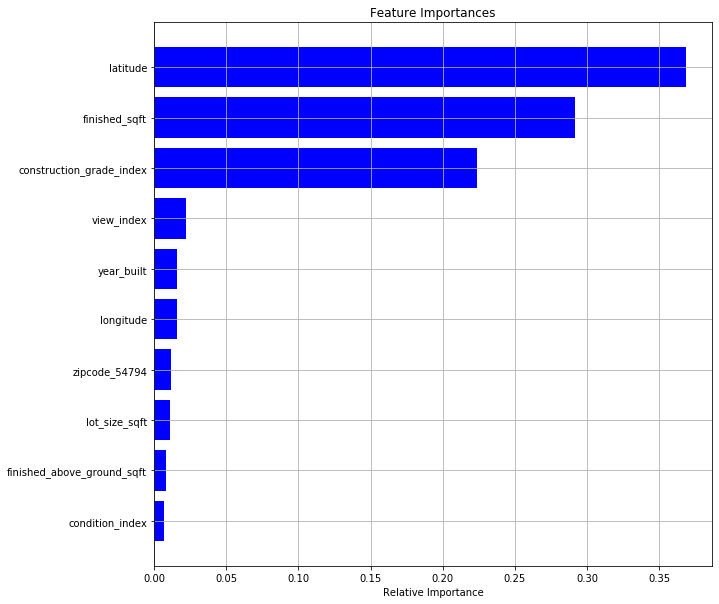

In [94]:
#Feature Importance:
features = X_train.columns
importances = gb.feature_importances_
indices = np.argsort(importances)

#Top 10 
num_features = 10 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')

plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

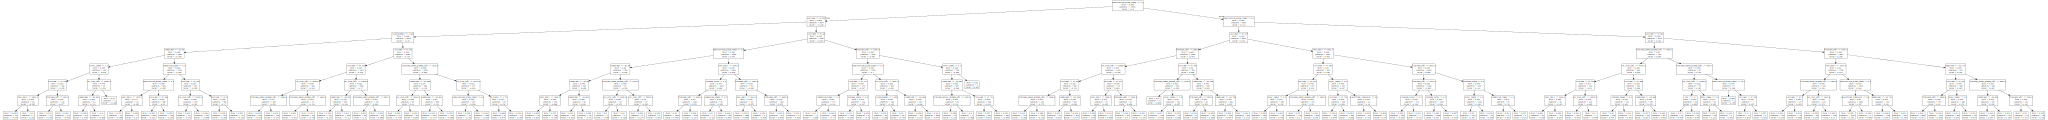

In [92]:
#Plot a tree:
sub_tree = reg.estimators_[1,0]
dot_data = tree.export_graphviz(sub_tree, out_file=None, 
                                feature_names=X_train.columns,
                               filled = False)
graphviz.Source(dot_data, format="png") 
